In [ ]:
import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy.sql import select
from sqlalchemy import Table, Column, Integer, String, MetaData, ForeignKey

engine = create_engine('postgresql://postgres: @localhost:5432/Employee_SQL_Homework_db')
conn = engine.connect()

metadata = MetaData()
metadata.create_all(engine)

employees = Table('employees', metadata,
   Column('emp_no', Integer, primary_key=True),
   Column('first_name', String),
   Column('last_name', String),
)


In [ ]:
s = select([employees])
result = conn.execute(s)

#for row in result:
#    print(row)

print(result)
#df = pd.DataFrame(rows, columns = ['emp_no,'first_name','last_name'])
#df

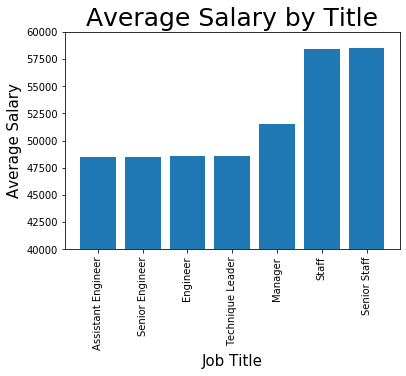

In [50]:
#2. Create a bar chart of average salary by title.
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

sql_statement  = "select t.title, to_char(round(avg(s.salary), 2), 'L999,999.99'), round(avg(s.salary), 2) "
sql_statement += "from salaries s "
sql_statement += "join titles t on t.emp_no = s.emp_no "
sql_statement += "group by t.title "
sql_statement += "order by 2"

conn = psycopg2.connect("dbname=Employee_SQL_Homework_db user=postgres password=' '")
cur = conn.cursor() 
cur.execute(sql_statement)
rows = cur.fetchall()
cur.close()
conn.close()
df = pd.DataFrame(rows, columns = ['title','avg_salary', 'salary'])
#df

#plt.bar(df['title'], df['avg_salary'])
plt.bar(df['title'], df['salary'])
plt.xticks(rotation='vertical')
plt.title("Average Salary by Title", fontsize=25)
plt.xlabel("Job Title", fontsize=15)
plt.ylabel("Average Salary", fontsize=15)

plt.ylim((40000,60000))
plt.show()